In [1]:
%pip install davos
import davos

davos.config.suppress_stdout = True

Note: you may need to restart the kernel to use updated packages.


In [2]:
smuggle numpy as np               # pip: numpy==1.24.2
smuggle matplotlib.pyplot as plt  # pip: matplotlib==3.7.0
smuggle pandas as pd              # pip: pandas==1.5.3
smuggle seaborn as sns            # pip: seaborn==0.12.2

from sklearn.decomposition smuggle IncrementalPCA as PCA  # pip: scikit-learn==1.2.1

import os

In [3]:
basedir = os.path.split(os.path.split(os.getcwd())[0])[0]
datadir = os.path.join(basedir, 'data')
figdir = os.path.join(basedir, 'paper', 'figs', 'source')

pie1 = os.path.join(datadir, 'images', 'pie_photo.jpg')
pie2 = os.path.join(datadir, 'images', 'pie_drawing.jpg')

Pie photo

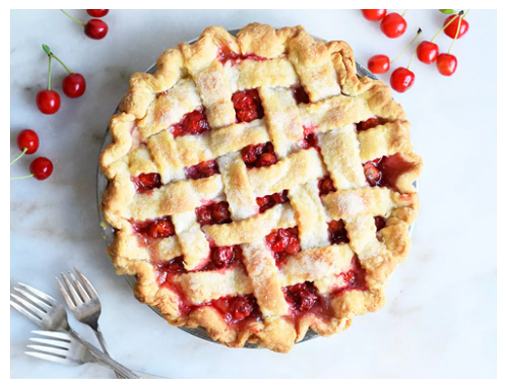

In [4]:
plt.imshow(plt.imread(pie1))
plt.axis('off');

Pie drawing

(-0.5, 499.5, 379.5, -0.5)

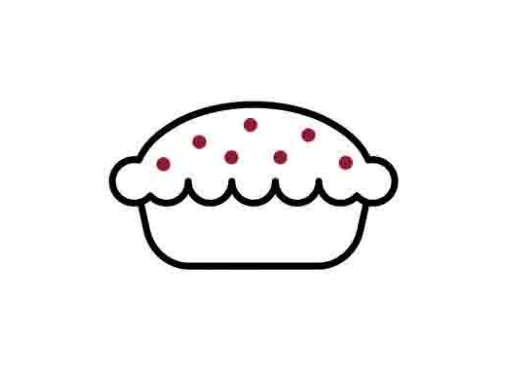

In [5]:
plt.imshow(plt.imread(pie2))
plt.axis('off')

In [6]:
def img2vec(img):
    x = plt.imread(img)
    return x.reshape(x.shape[0], -1)

def vec2img(vec):
    vec[vec > 255] = 255
    vec[vec < 0] = 0
    return vec.reshape(380, 500, 3).transpose(0, 1, 2) / 255

In [18]:
def plot_pca(img, var_explained=[1.0, 0.95, 0.75, 0.50], n_components=None, fname=None):
    components = lambda var_explained, p: np.where((np.abs(var_explained - p)) == np.min(np.abs(var_explained - p)))[0][0]

    pca = PCA()
    pca.fit(img2vec(img))
    vx = pca.explained_variance_ratio_.cumsum()

    if n_components is None:
        n_components = [components(vx, p) if p < 1.0 else img2vec(img).shape[0] for p in var_explained]

    fig, axes = plt.subplots(1, len(n_components), figsize=(10, 3))
    for i, n in enumerate(n_components):
        pca = PCA(n_components=n)
        pca.fit(img2vec(img))
        axes[i].imshow(vec2img(pca.inverse_transform(pca.transform(img2vec(img)))))
        axes[i].axis('off')

        if var_explained is None:
            axes[i].set_title(f'{int(np.round(100 * vx[n - 1]))}% ({n})', fontsize=15)
        elif var_explained[i] == 1.0:
            axes[i].set_title(f'{int(100 * var_explained[i])}% ({n})', fontsize=15)
        else:
            axes[i].set_title(f'{int(100 * var_explained[i])}% ({n + 2})', fontsize=15)
    
    if fname is not None:
        plt.savefig(os.path.join(figdir, fname + '.pdf'), bbox_inches='tight')
    
    return fig

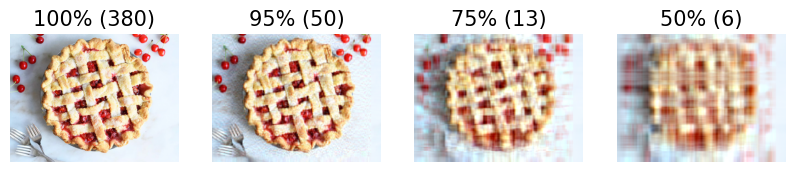

In [19]:
plot_pca(pie1, var_explained=[1.0, 0.95, 0.75, 0.50], fname='pie_photo_var_explained');

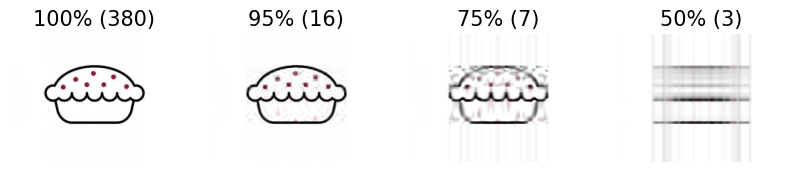

In [20]:
plot_pca(pie2, var_explained=[1.0, 0.95, 0.75, 0.50], fname='pie_drawing_var_explained');

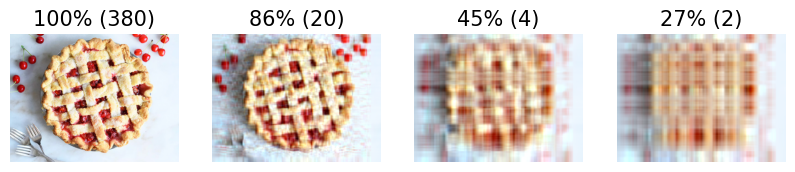

In [21]:
plot_pca(pie1, var_explained=None, n_components=[380, 20, 4, 2], fname='pie_photo_n_components');

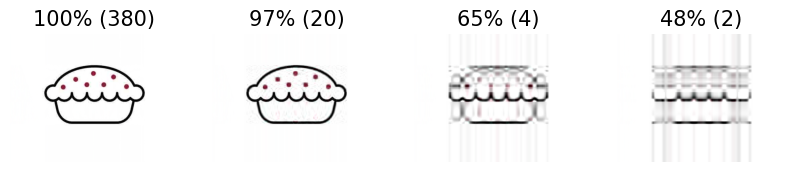

In [22]:
plot_pca(pie2, var_explained=None, n_components=[380, 20, 4, 2], fname='pie_drawing_n_components');

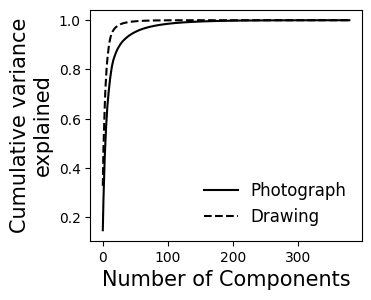

In [12]:
pca1 = PCA()
pca1.fit(img2vec(pie1))

pca2 = PCA()
pca2.fit(img2vec(pie2))

fig = plt.figure(figsize=(3.5, 3))
ax = plt.gca()
ax.plot(pca1.explained_variance_ratio_.cumsum(), 'k-', label='Photograph');
ax.plot(pca2.explained_variance_ratio_.cumsum(), 'k--', label='Drawing');
ax.legend(frameon=False, fontsize=12);
ax.set_xlabel('Number of Components', fontsize=15);
ax.set_ylabel('Cumulative variance\nexplained', fontsize=15);

plt.savefig(os.path.join(figdir, 'pies_cumulative_var_explained.pdf'), bbox_inches='tight')